#### Libraries
Libraries used in this notebook are:
- [numpy](https://numpy.org/) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.  
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and data manipulation library built on top of the Python programming language.  
- [matplotlib](https://matplotlib.org/) is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
- [seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.  
- [scipy](https://www.scipy.org/) is a free and open-source Python library used for scientific and technical computing. It is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.  
- [scikit-learn](https://scikit-learn.org/stable/) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.   

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash_bio


#### Visualizations
Full instructions can be found [here](https://hemtools.readthedocs.io/en/latest/content/Bioinformatics_Core_Competencies/Volcanoplot.html)


##### Basic Plots

In [2]:
# load sample data as a pandas dataframe
df = pd.read_csv('test.csv') # pandas method to read csv file

# clean null values
df = df.dropna()

# preview the data (first 5 rows)
df.head()

,Name,Obp44a-/-_1,Obp44a-/-_2,Obp44a-/-_3,WT_1,WT_2,WT_3,7A Avg,CS Avg,FC,Log2FC,pval,minuslog10(pval)
0,13-HODE,6.652667e+03,8.484667e+03,4.238667e+03,2898.00000,2.331000e+03,2392.666667,6.458667e+03,2540.555556,2.542226,1.346092,0.034409,1.463326
1,DG(i-14:0/0:0/13:0),2.812667e+03,2.066000e+03,2.966000e+03,1888.00000,1.489333e+03,1759.333333,2.614889e+03,1712.222222,1.527190,0.610880,0.040297,1.394723
2,L-Phosphoarginine,1.187180e+06,1.643805e+06,1.691681e+06,814283.33330,1.172822e+06,686245.333300,1.507556e+06,891116.888900,1.691760,0.758525,0.046787,1.329877
3,LysoPE(0:0/20:0),4.179333e+03,3.395333e+03,4.147333e+03,2556.00000,2.978000e+03,1854.666667,3.907333e+03,2462.888889,1.586484,0.665833,0.025506,1.593356
4,MG(22:0/0:0/0:0),5.464133e+04,5.547867e+04,5.519333e+04,41929.33333,3.487733e+04,37518.000000,5.510444e+04,38108.222220,1.445999,0.532066,0.001203,2.919832


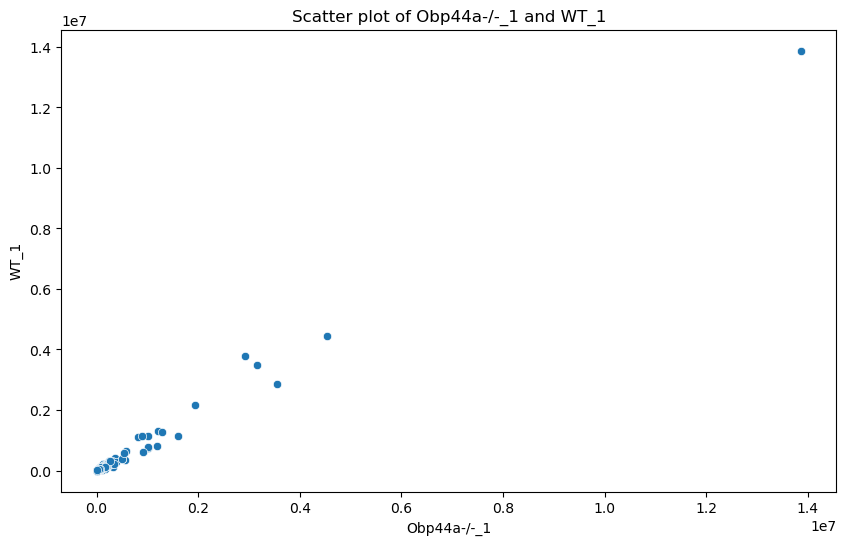

In [3]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Obp44a-/-_1', y='WT_1', data=df)
plt.title('Scatter plot of Obp44a-/-_1 and WT_1')
plt.show()


c:\Users\heyeh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



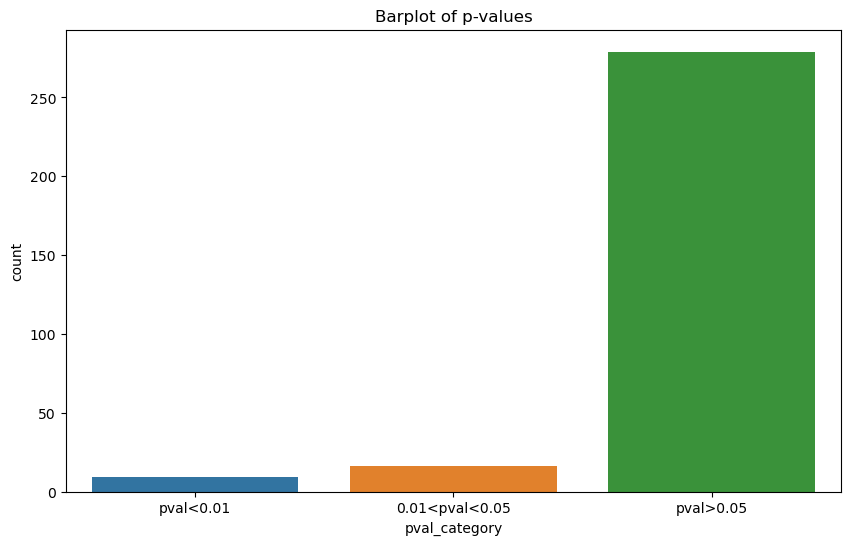

In [4]:
# Barplot of pval<0.01, 0.01 <pval<0.05, pval>0.05
# create a new column to categorize p-values
df['pval_category'] = pd.cut(df['pval'], bins=[-np.inf, 0.01, 0.05, np.inf], labels=['pval<0.01', '0.01<pval<0.05', 'pval>0.05'])

# count the number of p-values in each category
pval_count = df['pval_category'].value_counts().reset_index()
pval_count.columns = ['pval_category', 'count']

# plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='pval_category', y='count', data=pval_count)
plt.title('Barplot of p-values')
plt.show()



c:\Users\heyeh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



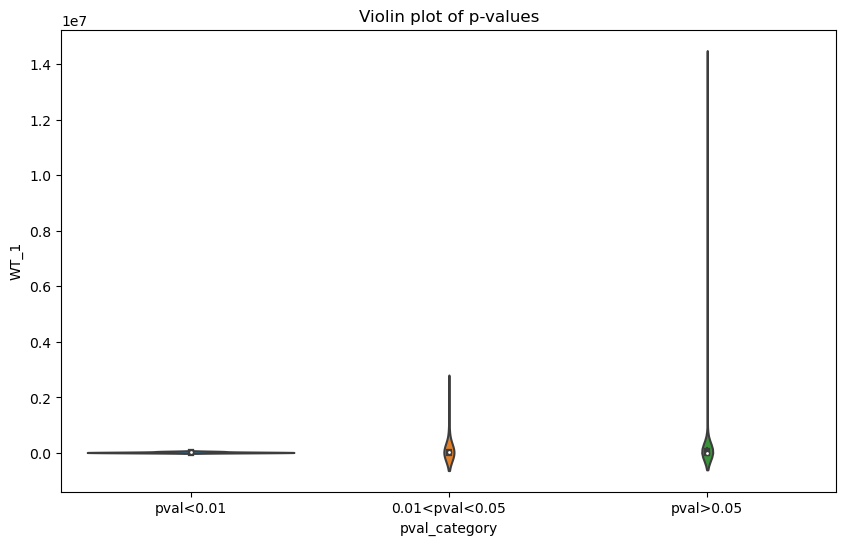

In [5]:

# Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='pval_category', y='WT_1', data=df)
plt.title('Violin plot of p-values')
plt.show()



##### MA Plot

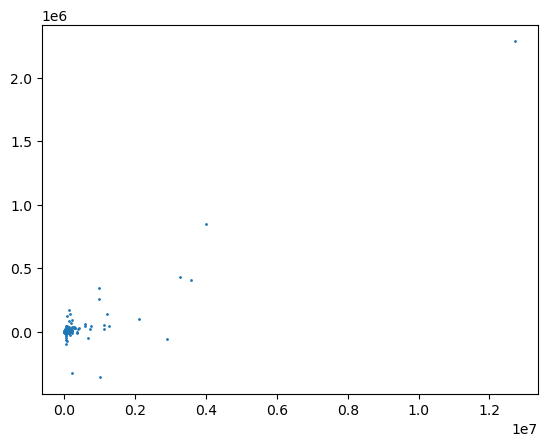

In [6]:
# MA plot

A = (df['WT_1']+df['WT_2'])/2
M = df['WT_1']-df['WT_2']
plt.scatter(x=A,y=M,s=1) # s is point size

##### Volcano Plot

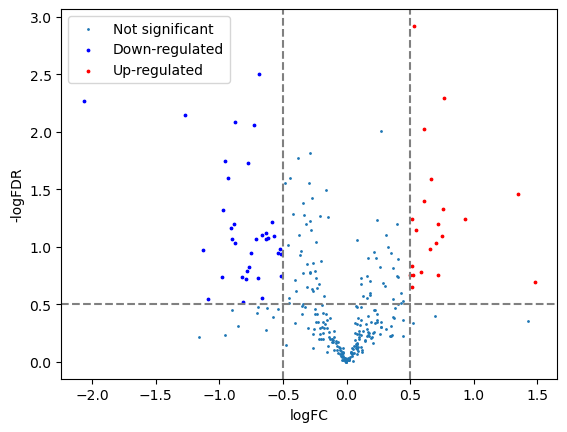

In [7]:
# Volcano Plot

plt.scatter(x=df['Log2FC'],y=df['minuslog10(pval)'],s=1, label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['Log2FC']<=-0.5)&(df['minuslog10(pval)']>=0.5)]
up = df[(df['Log2FC']>=0.5)&(df['minuslog10(pval)']>=0.5)]

plt.scatter(x=down['Log2FC'],y=down['minuslog10(pval)'],s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['Log2FC'],y=up['minuslog10(pval)'],s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-0.5,color="grey",linestyle="--")
plt.axvline(0.5,color="grey",linestyle="--")
plt.axhline(0.5,color="grey",linestyle="--")
plt.legend()


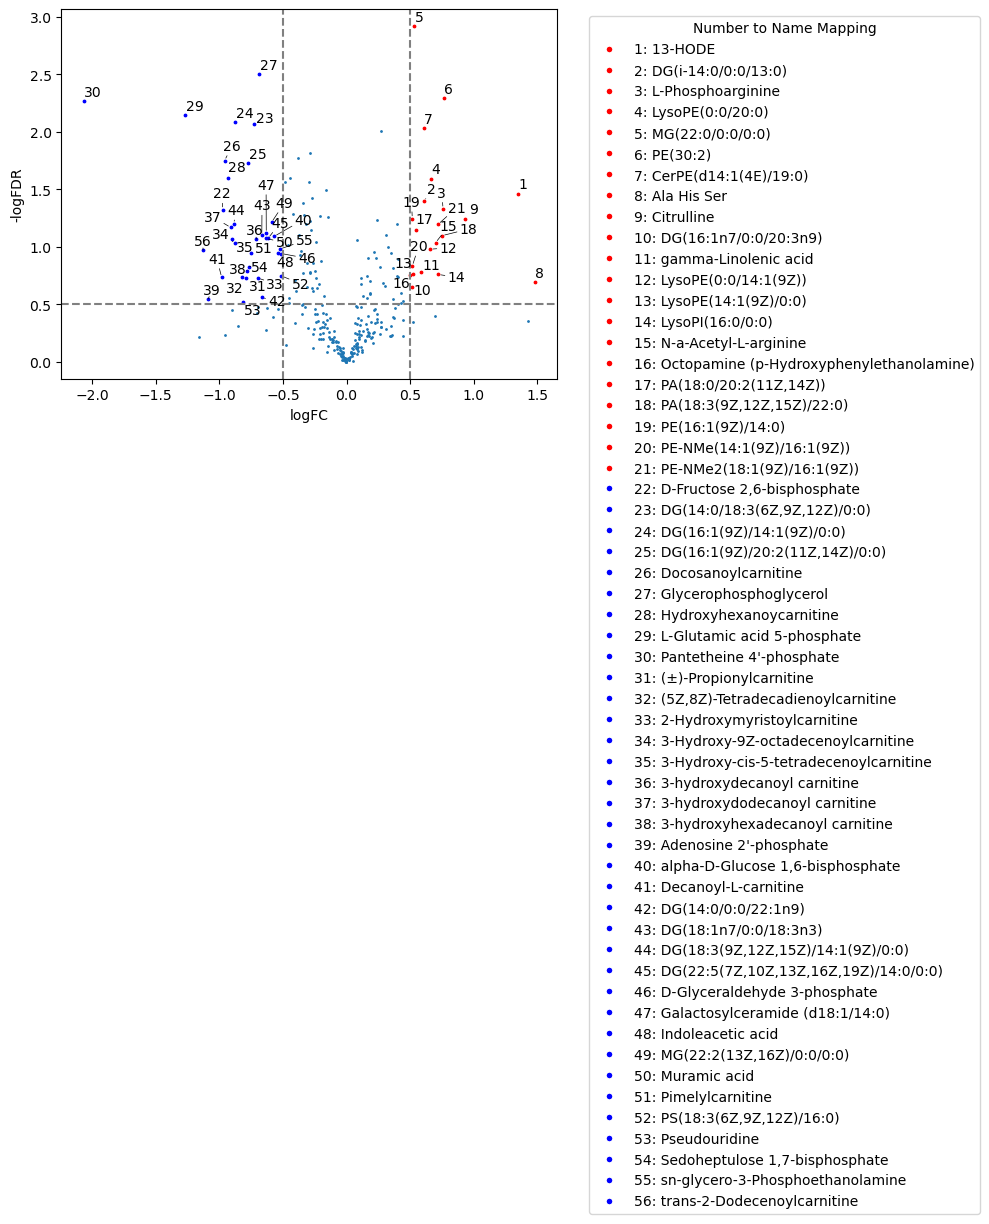

In [8]:
plt.scatter(x=df['Log2FC'],y=df['minuslog10(pval)'],s=1, label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['Log2FC']<=-0.5)&(df['minuslog10(pval)']>=0.5)]
up = df[(df['Log2FC']>=0.5)&(df['minuslog10(pval)']>=0.5)]

plt.scatter(x=down['Log2FC'],y=down['minuslog10(pval)'],s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['Log2FC'],y=up['minuslog10(pval)'],s=3,label="Up-regulated",color="red")

from adjustText import adjust_text
# Create a dictionary to store the mapping of numbers to names
up_name_mapping = {i: name for i, name in enumerate(up['Name'], 1)}
down_name_mapping = {i: name for i, name in enumerate(down['Name'], len(up['Name']) + 1)}

# Adjust text for up-regulated genes with numbered labels
texts = []
for i, (index, r) in enumerate(up.iterrows(), 1):
    texts.append(plt.text(x=r['Log2FC'], y=r['minuslog10(pval)'], s=str(i)))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Adjust text for down-regulated genes with numbered labels
texts = []
for i, (index, r) in enumerate(down.iterrows(), len(up['Name']) + 1):
    texts.append(plt.text(x=r['Log2FC'], y=r['minuslog10(pval)'], s=str(i)))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-0.5,color="grey",linestyle="--")
plt.axvline(0.5,color="grey",linestyle="--")
plt.axhline(0.5,color="grey",linestyle="--")
plt.legend()

handles = []
for i, name in up_name_mapping.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label=f"{i}: {name}"))

for i, name in down_name_mapping.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label=f"{i}: {name}"))

plt.legend(handles=handles, title="Number to Name Mapping", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

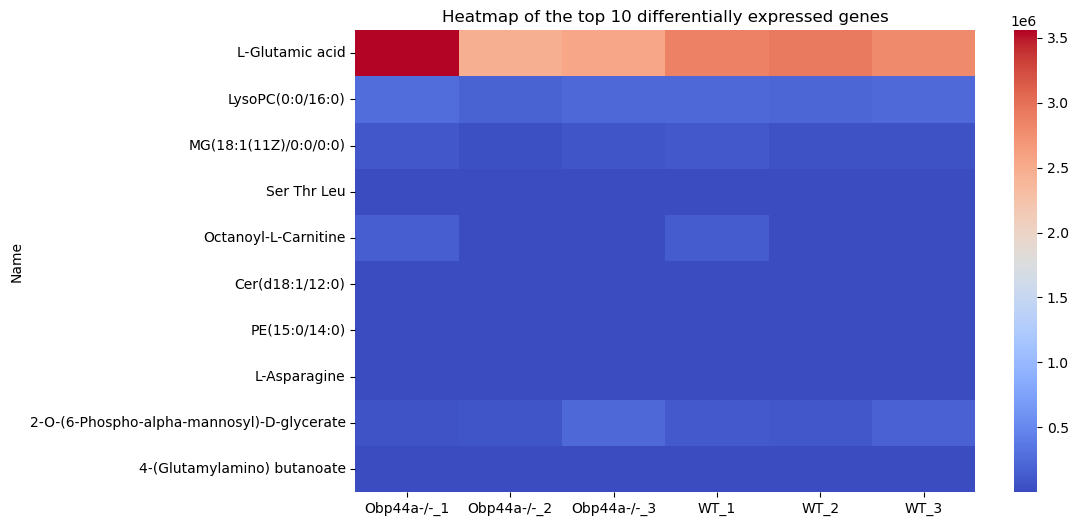

In [9]:
# Heat Map
# create a heatmap of the top 10 differentially expressed genes
top_10_genes = df.sort_values('minuslog10(pval)').head(10)
top_10_genes = top_10_genes.set_index('Name')
top_10_genes = top_10_genes.drop(['pval', 'pval_category', '7A Avg','CS Avg','FC','Log2FC','pval','minuslog10(pval)'], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(top_10_genes, cmap='coolwarm')
plt.title('Heatmap of the top 10 differentially expressed genes')
plt.show()



In [ ]:
name = '3-hydroxyoctanoyl carnitine,Ala Val Met,Glycerophosphoglycerol'
.split(',')